<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/sprint3_%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

問題1～7

In [97]:
class ScratchLinearRegression():
  def __init__(self, num_iter=1, lr=0.2,verbose=True):
    # ハイパーパラメータを属性として記録
    self.iter = 1000
    self.lr = 0.000000001
    self.no_bias = 1
    self.verbose = verbose
    # 損失を記録する配列を用意
    self.loss = np.zeros(self.iter)
    self.val_loss = np.zeros(self.iter)
    self.cost=[]
  def _linear_hypothesis(self,X,theta):
      #仮定関数の実装
      y_hat=np.dot(X,self.theta.T) #(j,n)×(n,1)=(j,1)
      return y_hat

  def _gradient_descent(self,X,y,theta):
      
      n=X.shape[0] #サンプル数の数  
      #yを(j,1)に
      y=y.reshape(y.shape[0],1)
      for i in range(self.iter):
        #y_hat呼び出し
        y_hat=self._linear_hypothesis(X,self.theta)
  
        #微分計算
        dtheta=np.sum(X*(y_hat-y),axis=0)*(1/n) #(j,n)×(j,1)=(j,n)→ axis=0のsumにより(1,n) 
        #print("dtheta"+str(dtheta))

        #コスト関数計算
        self.cost.append((1/(2*n))*np.sum((y_hat-y)**2,axis=0)) #(1,1)
        """
        if self.verbose:
          print("cost: "+str(self.cost[i]))
        """
        #theta更新
        self.theta = self.theta - self.lr*dtheta #(1,n)
        #print("theta"+str(theta.shape))
      return self.cost,self.theta

  def fit(self, X, y, X_val=None, y_val=None):
      #init_thetaの実装 (1行,n列)
      self.theta=np.random.rand(1,X.shape[1])

      #最急降下法実装

      self.cost, self.theta =self._gradient_descent(X,y,self.theta)

      plt.plot(self.cost)
      plt.ylabel("Cost")
      plt.xlabel("Iteration")
      plt.show()
      return self.theta
  def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        y_pred=np.dot(X,self.theta.T) #(j,n)×(n,1)=(j,1)
        return y_pred

In [98]:
#House Priceコンペデータ
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/1月/2_week3/授業前課題/data/train.csv',dtype = None)


In [100]:
import numpy as np

In [101]:
x_1=train.loc[:,'GrLivArea']
x_2=train.loc[:,'YearBuilt']

x=pd.concat([x_1,x_2],axis=1)
y=train.loc[:,'SalePrice']

#前処理用の結合
xy=pd.concat([x,y],axis=1)

In [102]:
#欠損値の確認・削除

x1_mis_par=train.loc[:,'GrLivArea'].isnull().sum()/len(train)*100
x2_mis_par=train.loc[:,'YearBuilt'].isnull().sum()/len(train)*100
y_mis_par=train.loc[:,'SalePrice'].isnull().sum()/len(train)*100

#欠損値の削除
xy.dropna(how='all')


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [103]:
from sklearn.model_selection import train_test_split
#Numpy化
X_1 = xy.iloc[:,0].values.reshape(-1,1)
X_2 = xy.iloc[:,1].values.reshape(-1,1)
print(X_1.shape)
y = xy.iloc[:,2].values
print(y.shape)
#訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.25, random_state=0)

(1460, 1)
(1460,)


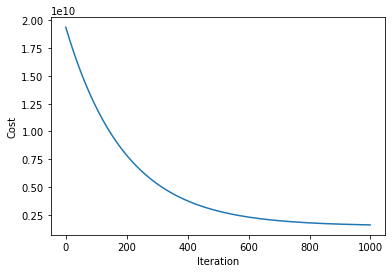

(365, 1)
(365, 1)


In [104]:
slr=ScratchLinearRegression()
slr.fit(x_train,y_train)
y_pred=slr.predict(x_test)
print(y_pred.shape)
print(x_test.shape)

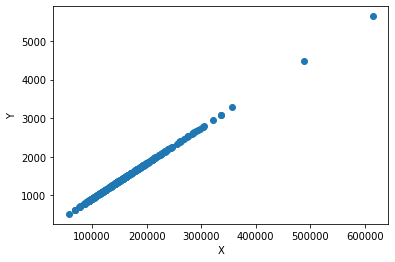

In [105]:
#スクラッチグラフ
plt.scatter(y_pred,x_test)
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

(365,)


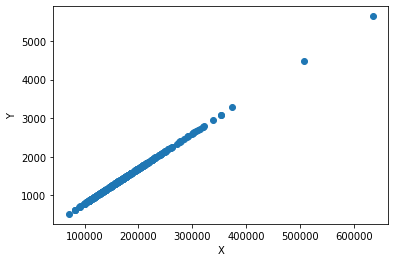

In [106]:
#SK-learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)
print(y_pred2.shape)
plt.scatter(y_pred2,x_test)
plt.ylabel("Y")
plt.xlabel("X")
plt.show()


In [107]:
#評価（決定係数）
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  #スクラッチ

0.39229217619426415

In [108]:
r2_score(y_test, y_pred2)  #sk-learn

0.4387893669360625